# Forecasting: Principles and Practice
## Module 7: Exponential Smoothing
Exercise

In [1]:
library(ggplot2)
library(fpp2)

Loading required package: forecast
Loading required package: fma
Loading required package: expsmooth


In [5]:
options(repr.plot.width=8, repr.plot.height=2)

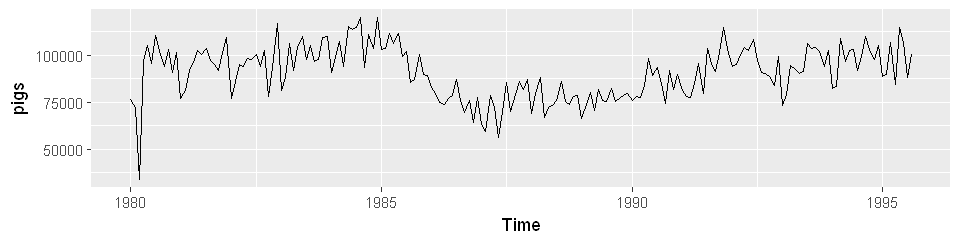

In [6]:
help(pigs)
# Monthly total number of pigs slaughtered
autoplot(pigs)

In [8]:
fces <- ses(pigs, h = 4)
summary(fces)


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = pigs, h = 4) 

  Smoothing parameters:
    alpha = 0.2971 

  Initial states:
    l = 77260.0561 

  sigma:  10308.58

     AIC     AICc      BIC 
4462.955 4463.086 4472.665 

Error measures:
                   ME    RMSE      MAE       MPE     MAPE      MASE       ACF1
Training set 385.8721 10253.6 7961.383 -0.922652 9.274016 0.7966249 0.01282239

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Sep 1995       98816.41 85605.43 112027.4 78611.97 119020.8
Oct 1995       98816.41 85034.52 112598.3 77738.83 119894.0
Nov 1995       98816.41 84486.34 113146.5 76900.46 120732.4
Dec 1995       98816.41 83958.37 113674.4 76092.99 121539.8


In [10]:
(s <- sd(residuals(fces)))
(lo95 <- 98816.41 - 1.96*s)
(hi95 <- 98816.41 + 1.96*s)

[1] 10273.69

[1] 78679.97

[1] 118952.8

My interval is smaller than the interval R computes. In ses, the variance of the forecast is $\sigma_h^2 = \sigma^2[1+\alpha^2(h-1)]$. 

In our case, $\sigma^2$ = 

In [12]:
(sigma2 <- var(residuals(fces)))

[1] 105548774

$\alpha = 0.2971$, and $h = 4$. So $\sigma_h^2 = $

In [13]:
(sigmah2 <- sigma2 * (1 + (0.2971^2)*3))

[1] 133498641

So the S.D. R uses for 95% PI is 

In [14]:
sqrt(sigmah2)

[1] 11554.16

which is larger than the standard deviation of residuals $s = 10273.693294987$

In [26]:
myses <- function (y, alpha, level){
    t <- length(y)
    fc <- (1 - alpha)^t * level
    for (i in 1:t){
        fc <- fc + alpha * (1 - alpha)^(t-i) * y[i]
    }
    return(fc)
}

In [27]:
myses(pigs, 0.2971, 77260.0561)

[1] 98816.45

In [47]:
MSE <- function (y, par){
    alpha <- par[1]
    level <- par[2]
    t <- length(y)
    fc <- ts(0, start = start(y), end = end(y), frequency = frequency(y))
    sum <- 0
    for (i in 1:t){
        if (i == 1){
            fc[i] <- level
        }
        else{
            fc[i] <- alpha * y[i-1] + (1 - alpha) * fc[i-1]
        }
        sum <- sum + (y[i] - fc[i])^2
    }
    return(sum)
}

In [52]:
(opt <- optim(par = c(0,pigs[1]) , MSE, y = pigs))
opt$par[1]

ERROR while rich displaying an object: Error in vapply(seq_along(mapped), function(i) {: values must be length 1,
 but FUN(X[[5]]) result is length 0

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_html.list(obj)
9. repr_list_generic(obj, "html", "\t<li>%s</li>\n", "\t<dt>$%s</dt>\n\t\t<dd>%s</dd>\n", 
 .     "<strong>$%s</strong> = %s", "<ol>\n%s</ol>\n", "<dl>\n%s</dl>\n", 
 .     numeric_item = "\t<dt>[[%s]]</dt>\n\t\

$par
[1]     0.297086 77272.075070

$value
[1] 19765613447

$counts
function gradient 
     179       NA 

$convergence
[1] 0

$message
NULL


[1] 0.297086

In [53]:
fc <- function(y){
    opt <- optim(par = c(0.5, y[1]), MSE, y = y)
    alpha <- opt$par[1]
    level <- opt$par[2]
    return(myses(y, alpha, level))
}

In [54]:
fc(pigs)

[1] 98814.55

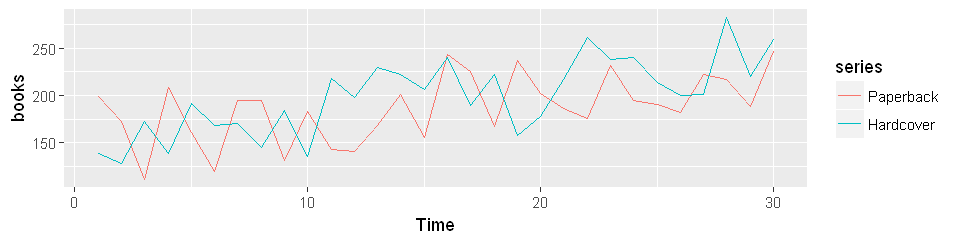

In [55]:
autoplot(books)
# Daily sales of books

In [57]:
fc_paper <- ses(books[, "Paperback"], h = 4)
fc_hard <- ses(books[, "Hardcover"], h = 4)

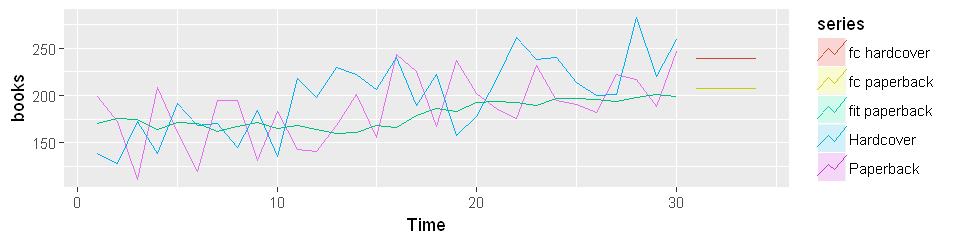

In [66]:
autoplot(books) +
    autolayer(fitted(fc_paper), series = "fit paperback") +
    autolayer(fc_paper, series = "fc paperback", PI = F) +
    autolayer(fc_hard, series = "fc hardcover", PI = F)

In [63]:
(RMSE1 <- sqrt(mean(residuals(fc_paper)**2)))

[1] 33.63769

In [64]:
(RMSE2 <- sqrt(mean(residuals(fc_hard)**2)))

[1] 31.93101

In [67]:
holt_p <- holt(books[, "Paperback"], h = 4)
holt_h <- holt(books[, "Hardcover"], h = 4)

In [69]:
(RMSEh1 <- sqrt(mean(residuals(holt_p)**2)))
(RMSEh1 <- sqrt(mean(residuals(holt_h)**2)))

[1] 31.13692

[1] 27.19358

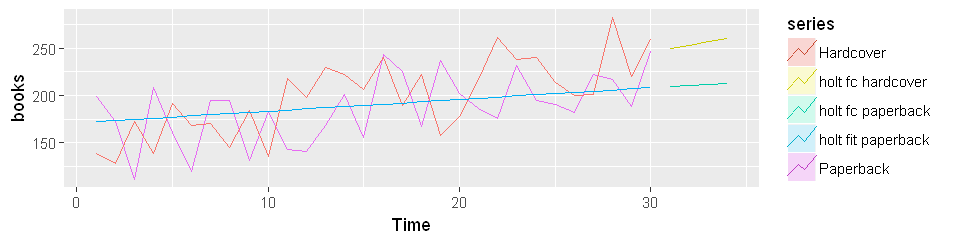

In [70]:
autoplot(books) +
    autolayer(fitted(holt_p), series = "holt fit paperback") +
    autolayer(holt_p, series = "holt fc paperback", PI = F) +
    autolayer(holt_h, series = "holt fc hardcover", PI = F)